In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # show all outputs in the same cell

np.set_printoptions(precision=4)# show only four decimal digits

In [398]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [352]:
movies=pd.read_csv(r"C:\Users\Neha Thakar\Desktop\Spring Term\Unstructured Data Modeling\Project\test_movies_single.csv")

# Exploring the Data

In [353]:
movies.head(10)
movies.info()
movies.shape

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000355,1,Fire!,\N,\N,original,\N,1,tt0000355,short,Fire!,Fire!,0,1901,\N,5,"Drama,Short",6.1,509
1,tt0003760,9,Caught in the Rain,\N,\N,original,\N,1,tt0003760,short,Caught in the Rain,Caught in the Rain,0,1914,\N,16,"Comedy,Short",5.7,751
2,tt0004101,6,His New Profession,\N,\N,original,\N,1,tt0004101,short,His New Profession,His New Profession,0,1914,\N,16,"Comedy,Short",6.0,1018
3,tt0008519,3,A Romance of the Redwoods,\N,\N,original,\N,1,tt0008519,movie,A Romance of the Redwoods,A Romance of the Redwoods,0,1917,\N,70,"Adventure,Comedy,Drama",5.7,712
4,tt0008634,4,Straight Shooting,\N,\N,original,\N,1,tt0008634,movie,Straight Shooting,Straight Shooting,0,1917,\N,57,Western,6.2,335
5,tt0008663,1,Terje Vigen,\N,\N,original,\N,1,tt0008663,movie,A Man There Was,Terje Vigen,0,1917,\N,48,"Drama,War",7.4,1384
6,tt0009086,3,The Forbidden City,\N,\N,original,\N,1,tt0009086,movie,The Forbidden City,The Forbidden City,0,1918,\N,62,"Drama,Romance",5.4,270
7,tt0009932,1,"Billy Blazes, Esq.",\N,\N,original,\N,1,tt0009932,short,"Billy Blazes, Esq.","Billy Blazes, Esq.",0,1919,\N,12,"Comedy,Short,Western",6.1,699
8,tt0011909,7,The Affairs of Anatol,\N,\N,original,\N,1,tt0011909,movie,The Affairs of Anatol,The Affairs of Anatol,0,1921,\N,117,"Comedy,Drama",6.6,1191
9,tt0012642,7,A Sailor-Made Man,\N,\N,original,\N,1,tt0012642,movie,A Sailor-Made Man,A Sailor-Made Man,0,1921,\N,47,Comedy,7.0,901


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 19 columns):
titleId            1539 non-null object
ordering           1539 non-null int64
title              1539 non-null object
region             1539 non-null object
language           1539 non-null object
types              1539 non-null object
attributes         1539 non-null object
isOriginalTitle    1539 non-null int64
tconst             1539 non-null object
titleType          1539 non-null object
primaryTitle       1539 non-null object
originalTitle      1539 non-null object
isAdult            1539 non-null int64
startYear          1539 non-null int64
endYear            1539 non-null object
runtimeMinutes     1539 non-null object
genres             1539 non-null object
averageRating      1539 non-null float64
numVotes           1539 non-null int64
dtypes: float64(1), int64(5), object(13)
memory usage: 228.5+ KB


(1539, 19)

In [354]:
movies.region.unique()
movies.language.unique()
movies.attributes.unique()
movies.startYear.unique()
movies.types.unique()
movies.titleType.unique()
movies.averageRating.unique()
movies.genres.unique()

array(['\\N', 'US'], dtype=object)

array(['\\N', 'en'], dtype=object)

array(['\\N'], dtype=object)

array([1901, 1914, 1917, 1918, 1919, 1921, 1923, 1924, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1956, 1958, 1957, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1968, 1967, 1969, 1970, 1972, 1971, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1989, 1987, 1988, 1993, 1994, 1992, 1995, 1997, 1998,
       1999, 1996, 1990, 2000, 1904, 1991, 1898, 2001, 1894, 2002, 2004,
       2003, 2007, 2005, 2006, 2019, 2012, 2008, 2017, 2011, 2009, 2013,
       2010, 2015, 1897, 2018, 2014, 2016], dtype=int64)

array(['original'], dtype=object)

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'video', 'tvShort', 'tvSpecial', 'videoGame'],
      dtype=object)

array([ 6.1,  5.7,  6. ,  6.2,  7.4,  5.4,  6.6,  7. ,  6.9,  7.2,  6.5,
        8.1,  5.2,  6.7,  7.1,  6.8,  5.8,  7.5,  7.3,  4. ,  7.8,  7.7,
        7.9,  6.4,  8. ,  5. ,  6.3,  5.3,  7.6,  5.9,  2.1,  5.6,  3.2,
        4.9,  4.1,  2.7,  8.8,  8.2,  3.5,  5.1,  3.6,  5.5,  3.8,  4.7,
        4.6,  1.2,  4.3,  4.8,  9.3,  3.7,  4.2,  2.6,  8.7,  2.8,  2.9,
        2.2,  4.5,  8.4,  3.9,  4.4,  1.9,  8.5,  8.3,  8.6,  3.4,  8.9,
        2. ,  1.4,  2.3,  3. ,  2.4,  9. , 10. ,  9.4,  3.1,  9.6,  2.5,
        3.3,  9.1,  1.5,  9.5,  9.2])

array(['Drama,Short', 'Comedy,Short', 'Adventure,Comedy,Drama', 'Western',
       'Drama,War', 'Drama,Romance', 'Comedy,Short,Western',
       'Comedy,Drama', 'Comedy', 'Adventure,Comedy,Family',
       'Adventure,Drama,Mystery', 'Biography,Drama,History',
       'Drama,Romance,War', 'Adventure,Drama,Romance', 'Drama',
       'Drama,Mystery,Thriller', 'Comedy,Fantasy,Musical',
       'Comedy,Family,Short', 'Animation,Comedy,Family', 'Comedy,Mystery',
       'Comedy,Horror,Thriller', 'Mystery,Thriller',
       'Crime,Drama,Film-Noir', 'Crime,Mystery,Romance',
       'Action,Adventure,Drama', 'Comedy,Romance', 'Action,Comedy,Drama',
       'Horror,Romance,Sci-Fi', 'Crime,Drama', 'Comedy,Short,War',
       'Crime,Drama,Romance', 'Adventure,Romance', 'Comedy,Crime,Mystery',
       'Comedy,Drama,Family', 'Comedy,War', 'Action,Adventure,Comedy',
       'Adventure,History', 'Comedy,Musical', 'Crime,Drama,Mystery',
       'Comedy,Horror', 'Comedy,Musical,Romance', 'Drama,Thriller',
       'Act

In [355]:
movies.drop(['attributes'],axis=1)

,titleId,ordering,title,region,language,types,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000355,1,Fire!,\N,\N,original,1,tt0000355,short,Fire!,Fire!,0,1901,\N,5,"Drama,Short",6.1,509
1,tt0003760,9,Caught in the Rain,\N,\N,original,1,tt0003760,short,Caught in the Rain,Caught in the Rain,0,1914,\N,16,"Comedy,Short",5.7,751
2,tt0004101,6,His New Profession,\N,\N,original,1,tt0004101,short,His New Profession,His New Profession,0,1914,\N,16,"Comedy,Short",6.0,1018
3,tt0008519,3,A Romance of the Redwoods,\N,\N,original,1,tt0008519,movie,A Romance of the Redwoods,A Romance of the Redwoods,0,1917,\N,70,"Adventure,Comedy,Drama",5.7,712
4,tt0008634,4,Straight Shooting,\N,\N,original,1,tt0008634,movie,Straight Shooting,Straight Shooting,0,1917,\N,57,Western,6.2,335
5,tt0008663,1,Terje Vigen,\N,\N,original,1,tt0008663,movie,A Man There Was,Terje Vigen,0,1917,\N,48,"Drama,War",7.4,1384
6,tt0009086,3,The Forbidden City,\N,\N,original,1,tt0009086,movie,The Forbidden City,The Forbidden City,0,1918,\N,62,"Drama,Romance",5.4,270
7,tt0009932,1,"Billy Blazes, Esq.",\N,\N,original,1,tt0009932,short,"Billy Blazes, Esq.","Billy Blazes, Esq.",0,1919,\N,12,"Comedy,Short,Western",6.1,699
8,tt0011909,7,The Affairs of Anatol,\N,\N,original,1,tt0011909,movie,The Affairs of Anatol,The Affairs of Anatol,0,1921,\N,117,"Comedy,Drama",6.6,1191
9,tt0012642,7,A Sailor-Made Man,\N,\N,original,1,tt0012642,movie,A Sailor-Made Man,A Sailor-Made Man,0,1921,\N,47,Comedy,7.0,901


In [356]:
movies['numVotes']=movies["numVotes"].astype(float)
print(movies.dtypes)

titleId             object
ordering             int64
title               object
region              object
language            object
types               object
attributes          object
isOriginalTitle      int64
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult              int64
startYear            int64
endYear             object
runtimeMinutes      object
genres              object
averageRating      float64
numVotes           float64
dtype: object


In [357]:
movies['Score']=movies['averageRating']*movies['numVotes']

In [358]:
movies.head()
print(movies.dtypes)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
0,tt0000355,1,Fire!,\N,\N,original,\N,1,tt0000355,short,Fire!,Fire!,0,1901,\N,5,"Drama,Short",6.1,509.0,3104.9
1,tt0003760,9,Caught in the Rain,\N,\N,original,\N,1,tt0003760,short,Caught in the Rain,Caught in the Rain,0,1914,\N,16,"Comedy,Short",5.7,751.0,4280.7
2,tt0004101,6,His New Profession,\N,\N,original,\N,1,tt0004101,short,His New Profession,His New Profession,0,1914,\N,16,"Comedy,Short",6.0,1018.0,6108.0
3,tt0008519,3,A Romance of the Redwoods,\N,\N,original,\N,1,tt0008519,movie,A Romance of the Redwoods,A Romance of the Redwoods,0,1917,\N,70,"Adventure,Comedy,Drama",5.7,712.0,4058.4
4,tt0008634,4,Straight Shooting,\N,\N,original,\N,1,tt0008634,movie,Straight Shooting,Straight Shooting,0,1917,\N,57,Western,6.2,335.0,2077.0


titleId             object
ordering             int64
title               object
region              object
language            object
types               object
attributes          object
isOriginalTitle      int64
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult              int64
startYear            int64
endYear             object
runtimeMinutes      object
genres              object
averageRating      float64
numVotes           float64
Score              float64
dtype: object


In [359]:
movies_sorted=movies.sort_values("Score",ascending=False)
movies_sorted.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,The Wolf of Wall Street,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,Guardians of the Galaxy,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8
461,tt0120363,31,Toy Story 2,\N,\N,original,\N,1,tt0120363,movie,Toy Story 2,Toy Story 2,0,1999,\N,92,"Adventure,Animation,Comedy",7.9,490750.0,3876925.0


# Top 20 movies in terms of Rating and Votes

In [360]:
top20=movies_sorted.loc[:,["primaryTitle","genres","averageRating","numVotes"]]
top20["numVotes"]=top20["numVotes"].astype(int)
print(top20.head(20))

                                    primaryTitle                      genres  \
900                      The Wolf of Wall Street       Biography,Crime,Drama   
1133                     Guardians of the Galaxy     Action,Adventure,Comedy   
198               The Good, the Bad and the Ugly                     Western   
716   Pirates of the Caribbean: Dead Man's Chest    Action,Adventure,Fantasy   
461                                  Toy Story 2  Adventure,Animation,Comedy   
668          Harry Potter and the Goblet of Fire    Adventure,Family,Fantasy   
798                          There Will Be Blood                       Drama   
671                          Lost in Translation                       Drama   
723                                   The Office                      Comedy   
1027                                   127 Hours             Biography,Drama   
893                               Justice League    Action,Adventure,Fantasy   
1005                                    

# Top 20 movies in terms of Rating

In [361]:
movies_rating=movies.sort_values("averageRating",ascending=False)
movies_rating.head()
top20r=movies_rating.loc[:,["primaryTitle","genres","averageRating","numVotes"]]
top20r["numVotes"]=top20r["numVotes"].astype(int)
print(top20r.head(20))

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
928,tt10914342,2,Kirket,\N,\N,original,\N,1,tt10914342,movie,Kirket,Kirket,0,2019,\N,132,"Drama,Sport",10.0,587.0,5870.0
1423,tt5838588,2,God of War,\N,\N,original,\N,1,tt5838588,videoGame,God of War,God of War,0,2018,\N,\N,"Action,Adventure,Drama",9.6,12132.0,116467.2
1465,tt6741930,1,Blindsided,\N,\N,original,\N,1,tt6741930,tvEpisode,Blindsided,Blindsided,0,2018,\N,54,"Action,Crime,Drama",9.6,6147.0,59011.2
1014,tt1503406,2,Help Me,\N,\N,original,\N,1,tt1503406,tvEpisode,Help Me,Help Me,0,2010,\N,43,"Drama,Mystery",9.6,3492.0,33523.2
1464,tt6723708,2,Totsugeki,\N,\N,original,\N,1,tt6723708,tvEpisode,Totsugeki,Totsugeki,0,2017,\N,24,"Action,Adventure,Animation",9.5,2846.0,27037.0


                        primaryTitle                      genres  \
928                           Kirket                 Drama,Sport   
1423                      God of War      Action,Adventure,Drama   
1465                      Blindsided          Action,Crime,Drama   
1014                         Help Me               Drama,Mystery   
1464                       Totsugeki  Action,Adventure,Animation   
985       Uncharted 2: Among Thieves    Action,Adventure,Fantasy   
308                      Connections         Documentary,History   
1513         What's Past Is Prologue      Action,Adventure,Drama   
1535                    Kota Factory                Comedy,Drama   
1371       A Priest Walks Into a Bar         Crime,Drama,Fantasy   
977              The First David Job      Crime,Mystery,Thriller   
907                        Paternity         Crime,Drama,Mystery   
862                   Episode XXXVII  Action,Adventure,Animation   
662             O scrisoare pierduta            

# Top 20 movies in terms of Vote

In [362]:
movies_vote=movies.sort_values("numVotes",ascending=False)
movies_vote.head()
top20v=movies_vote.loc[:,["primaryTitle","genres","averageRating","numVotes"]]
top20v["numVotes"]=top20v["numVotes"].astype(int)
print(top20v.head(20))

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,The Wolf of Wall Street,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,Guardians of the Galaxy,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8
668,tt0330373,9,Harry Potter and the Goblet of Fire,\N,\N,original,\N,1,tt0330373,movie,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire,0,2005,\N,157,"Adventure,Family,Fantasy",7.7,501755.0,3863513.5


                                    primaryTitle                      genres  \
900                      The Wolf of Wall Street       Biography,Crime,Drama   
1133                     Guardians of the Galaxy     Action,Adventure,Comedy   
198               The Good, the Bad and the Ugly                     Western   
716   Pirates of the Caribbean: Dead Man's Chest    Action,Adventure,Fantasy   
668          Harry Potter and the Goblet of Fire    Adventure,Family,Fantasy   
461                                  Toy Story 2  Adventure,Animation,Comedy   
798                          There Will Be Blood                       Drama   
671                          Lost in Translation                       Drama   
893                               Justice League    Action,Adventure,Fantasy   
1027                                   127 Hours             Biography,Drama   
723                                   The Office                      Comedy   
1005                                    

# Most Common Genre

In [363]:
movies_sorted.head()
Genre = movies_sorted["genres"].astype(str)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,The Wolf of Wall Street,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,Guardians of the Galaxy,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8
461,tt0120363,31,Toy Story 2,\N,\N,original,\N,1,tt0120363,movie,Toy Story 2,Toy Story 2,0,1999,\N,92,"Adventure,Animation,Comedy",7.9,490750.0,3876925.0


In [364]:
Genre=Genre.tolist()

In [365]:
alist=[]
temp=[]

In [366]:
for x in Genre:
    temp=x.split(",")
    alist=alist+temp
len(alist)
temp=np.array(alist)
print(len(np.unique(temp)))
genretype=np.unique(temp)
print(genretype)


3391

28
['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'Game-Show'
 'History' 'Horror' 'Music' 'Musical' 'Mystery' 'News' 'Reality-TV'
 'Romance' 'Sci-Fi' 'Short' 'Sport' 'Talk-Show' 'Thriller' 'War' 'Western']


In [367]:
alist.count(genretype[0])

245

In [368]:
temp=0
countz=[]
for x in genretype:
    countz.append(alist.count(x))
    temp=temp+1
print(countz)
df={'Genre':genretype,'Count':countz} 
df=pd.DataFrame(df)
df.info()
df.head()
df=df.sort_values("Count",ascending=False)
print(df)

[245, 2, 175, 116, 42, 508, 225, 89, 753, 111, 101, 13, 6, 45, 164, 53, 25, 105, 1, 16, 201, 83, 43, 21, 4, 182, 43, 19]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
Genre    28 non-null object
Count    28 non-null int64
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


,Genre,Count
0,Action,245
1,Adult,2
2,Adventure,175
3,Animation,116
4,Biography,42


          Genre  Count
8         Drama    753
5        Comedy    508
0        Action    245
6         Crime    225
20      Romance    201
25     Thriller    182
2     Adventure    175
14       Horror    164
3     Animation    116
9        Family    111
17      Mystery    105
10      Fantasy    101
7   Documentary     89
21       Sci-Fi     83
15        Music     53
13      History     45
26          War     43
22        Short     43
4     Biography     42
16      Musical     25
23        Sport     21
27      Western     19
19   Reality-TV     16
11    Film-Noir     13
12    Game-Show      6
24    Talk-Show      4
1         Adult      2
18         News      1


<BarContainer object of 28 artists>

Text(0.5, 0, 'Count')

Text(0.5, 1.0, 'Genre Classification')

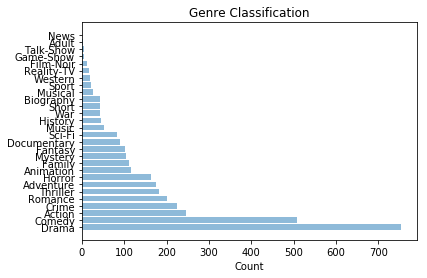

In [369]:
plt.barh(df.loc[:,"Genre"], df.loc[:,"Count"], align='center', alpha=0.5)

plt.xlabel('Count')
plt.title('Genre Classification')

plt.show()

In [370]:
movies_sorted.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,The Wolf of Wall Street,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,Guardians of the Galaxy,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8
461,tt0120363,31,Toy Story 2,\N,\N,original,\N,1,tt0120363,movie,Toy Story 2,Toy Story 2,0,1999,\N,92,"Adventure,Animation,Comedy",7.9,490750.0,3876925.0


In [371]:
medrating=movies_sorted["averageRating"].median()
print(medrating)

6.6


In [372]:
for label,row in movies_sorted.iterrows():
    if movies_sorted.loc[label,"averageRating"]>=medrating:
        movies_sorted.loc[label,"Recommended"]=1
    else:
        movies_sorted.loc[label,"Recommended"]=0



In [373]:
movies_sorted['Recommended'] = movies_sorted.Recommended.astype('category')
movies_sorted.head()
movies_sorted.info()


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score,Recommended
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,...,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8,1.0
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,...,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0,1.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,...,"Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8,1.0
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,...,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8,1.0
461,tt0120363,31,Toy Story 2,\N,\N,original,\N,1,tt0120363,movie,...,Toy Story 2,0,1999,\N,92,"Adventure,Animation,Comedy",7.9,490750.0,3876925.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 900 to 1204
Data columns (total 21 columns):
titleId            1539 non-null object
ordering           1539 non-null int64
title              1539 non-null object
region             1539 non-null object
language           1539 non-null object
types              1539 non-null object
attributes         1539 non-null object
isOriginalTitle    1539 non-null int64
tconst             1539 non-null object
titleType          1539 non-null object
primaryTitle       1539 non-null object
originalTitle      1539 non-null object
isAdult            1539 non-null int64
startYear          1539 non-null int64
endYear            1539 non-null object
runtimeMinutes     1539 non-null object
genres             1539 non-null object
averageRating      1539 non-null float64
numVotes           1539 non-null float64
Score              1539 non-null float64
Recommended        1539 non-null category
dtypes: category(1), float64(3), int64(4), object(

In [374]:
column_names = genretype
dummy = pd.DataFrame(columns = column_names)
dummy.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western


In [375]:
genretype

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'], dtype='<U11')

In [376]:
iter=0
#dummy.loc[0,genretype[0]]=1
#dummy.head()
#genretype[4] in Genre[0]

for x in Genre:
    temp=28
    while temp!=0: 
        if  genretype[28-temp] in x:
            dummy.loc[iter,genretype[28-temp]]=1
        else:
            dummy.loc[iter,genretype[28-temp]]=0
        temp=temp-1
    iter=iter+1   
    

In [377]:
dummy = dummy.astype('category')
dummy.info()
dummy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 28 columns):
Action         1539 non-null category
Adult          1539 non-null category
Adventure      1539 non-null category
Animation      1539 non-null category
Biography      1539 non-null category
Comedy         1539 non-null category
Crime          1539 non-null category
Documentary    1539 non-null category
Drama          1539 non-null category
Family         1539 non-null category
Fantasy        1539 non-null category
Film-Noir      1539 non-null category
Game-Show      1539 non-null category
History        1539 non-null category
Horror         1539 non-null category
Music          1539 non-null category
Musical        1539 non-null category
Mystery        1539 non-null category
News           1539 non-null category
Reality-TV     1539 non-null category
Romance        1539 non-null category
Sci-Fi         1539 non-null category
Short          1539 non-null category
Sport          1539

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [378]:
movies_sorted.tail()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score,Recommended
1157,tt2112307,10,Big Bad Bugs,\N,\N,original,\N,1,tt2112307,movie,...,Big Bad Bugs,0,2012,\N,95,"Action,Adventure,Comedy",2.3,273.0,627.9,0.0
800,tt0472278,1,Vampire Assassin,\N,\N,original,\N,1,tt0472278,video,...,Vampire Assassin,0,2005,\N,90,"Action,Horror",1.4,408.0,571.2,0.0
1032,tt1576703,2,Xuxa em O Mistério de Feiurinha,\N,\N,original,\N,1,tt1576703,movie,...,Xuxa em O Mistério de Feiurinha,0,2009,\N,82,Family,2.1,259.0,543.9,0.0
640,tt0291823,3,The Round and Round,\N,\N,original,\N,1,tt0291823,movie,...,The Round and Round,0,2002,\N,131,Drama,1.2,414.0,496.8,0.0
1204,tt2502186,4,Gummibär: The Yummy Gummy Search for Santa,\N,\N,original,\N,1,tt2502186,video,...,Gummibär: The Yummy Gummy Search for Santa,0,2012,\N,61,"Adventure,Animation,Comedy",1.4,268.0,375.2,0.0


In [379]:
movies_genre=movies_sorted.loc[:,["startYear","isAdult","runtimeMinutes","Recommended"]]
movies_genre.head()
movies_genre.info()
#result = pd.concat([dummy, movies_genre], axis=1,ignore_index=True)
#result=dummy.append(movies_genre,axis=1)
result = pd.concat([dummy,movies_genre.reset_index(drop=True)], axis=1)
result.tail()
result.info()

,startYear,isAdult,runtimeMinutes,Recommended
900,2013,0,180,1.0
1133,2014,0,121,1.0
198,1966,0,161,1.0
716,2006,0,151,1.0
461,1999,0,92,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 900 to 1204
Data columns (total 4 columns):
startYear         1539 non-null int64
isAdult           1539 non-null int64
runtimeMinutes    1539 non-null object
Recommended       1539 non-null category
dtypes: category(1), int64(2), object(1)
memory usage: 89.7+ KB


,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Short,Sport,Talk-Show,Thriller,War,Western,startYear,isAdult,runtimeMinutes,Recommended
1534,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2012,0,95,0.0
1535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,0,90,0.0
1536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2009,0,82,0.0
1537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2002,0,131,0.0
1538,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2012,0,61,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 32 columns):
Action            1539 non-null category
Adult             1539 non-null category
Adventure         1539 non-null category
Animation         1539 non-null category
Biography         1539 non-null category
Comedy            1539 non-null category
Crime             1539 non-null category
Documentary       1539 non-null category
Drama             1539 non-null category
Family            1539 non-null category
Fantasy           1539 non-null category
Film-Noir         1539 non-null category
Game-Show         1539 non-null category
History           1539 non-null category
Horror            1539 non-null category
Music             1539 non-null category
Musical           1539 non-null category
Mystery           1539 non-null category
News              1539 non-null category
Reality-TV        1539 non-null category
Romance           1539 non-null category
Sci-Fi            1539 non-null 

In [397]:
result['startYear'] = result.startYear.astype('category')
result['isAdult'] = result.isAdult.astype('category')
result['runtimeMinutes'].value_counts(dropna=False)
result=result[result.runtimeMinutes != r"\N"]
result['runtimeMinutes'] = result.runtimeMinutes.astype('int')
result.head()
result.info()

90     80
60     54
100    46
95     41
92     39
87     37
85     36
30     34
102    31
97     30
99     29
93     29
84     28
96     27
105    27
98     26
91     25
89     24
88     24
104    24
80     23
103    23
86     22
120    22
94     21
101    20
82     19
83     18
108    17
45     17
       ..
232     1
234     1
275     1
291     1
176     1
46      1
27      1
28      1
129     1
137     1
71      1
146     1
149     1
67      1
63      1
152     1
59      1
159     1
53      1
52      1
161     1
47      1
164     1
166     1
167     1
40      1
39      1
35      1
31      1
356     1
Name: runtimeMinutes, Length: 177, dtype: int64

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Short,Sport,Talk-Show,Thriller,War,Western,startYear,isAdult,runtimeMinutes,Recommended
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013,0,180,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2014,0,121,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1966,0,161,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2006,0,151,1.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1999,0,92,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1538
Data columns (total 32 columns):
Action            1492 non-null category
Adult             1492 non-null category
Adventure         1492 non-null category
Animation         1492 non-null category
Biography         1492 non-null category
Comedy            1492 non-null category
Crime             1492 non-null category
Documentary       1492 non-null category
Drama             1492 non-null category
Family            1492 non-null category
Fantasy           1492 non-null category
Film-Noir         1492 non-null category
Game-Show         1492 non-null category
History           1492 non-null category
Horror            1492 non-null category
Music             1492 non-null category
Musical           1492 non-null category
Mystery           1492 non-null category
News              1492 non-null category
Reality-TV        1492 non-null category
Romance           1492 non-null category
Sci-Fi            1492 non-null 

1.0    773
0.0    719
Name: Recommended, dtype: int64

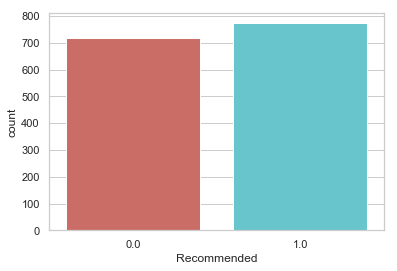

In [394]:
result['Recommended'].value_counts()
sns.countplot(x='Recommended',data=result,palette='hls')
plt.show()